<a href="https://colab.research.google.com/github/Juancarlos56/Repositorio-Simulacion-10/blob/main/Tarea11_investigacion_distribuciones_discretas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tarea 7 - Investigacion Distribuciones Discretas
### Desarrollado por: Juan Carlos Barrera Barrera

In [2]:
# Importación de bibliotecas
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats 
import seaborn as sns

### Introducción

#### ¿Por qué es importante conocer las distribuciones?


Muchos resultados en las ciencias se basan en conclusiones que se extraen sobre una población general a partir del estudio de una muestra de esta población. Este proceso se conoce como inferencia estadística; y este tipo de inferencia con frecuencia se basa en hacer suposiciones acerca de la forma en que los datos se distribuyen, o requiere realizar alguna transformación de los datos para que se ajusten mejor a alguna de las distribuciones conocidas y estudiadas en profundidad.




### Distribuciones Discretas

Las distribuciones discretas son aquellas en las que la variable puede tomar solo algunos valores determinados. Los principales exponentes de este grupo son las siguientes:

- Hipergeométrica
- Uniforme 
- binomial negativa

### Descripción

#### Hipergeométrica

La Distribución Hipergeométrica esta dada por la formula:

$$p(r; n, N, M) = \frac{\left(\begin{array}{c} M \\ r \end{array}\right)\left(\begin{array}{c} N - M\\ n -r \end{array}\right)}{\left(\begin{array}{c} N \\ n \end{array}\right)}$$

Donde:

- M = cantidad de éxitos posibles en la población
-  N = tamaño de población
- n = tamaño de la muestra
- r = valor que toma la variable aleatoria

En dónde el valor de r esta limitado por $max(0,n−N+M)$ y $min(n,M)$ inclusive; y los parámetros $n (1≤n≤N), N (N≥1)$ y $M (M≥1)$ son todos números enteros. La Distribución Hipergeométrica describe experimentos en donde se seleccionan los elementos al azar sin reemplazo (se evita seleccionar el mismo elemento más de una vez). Más precisamente, supongamos que tenemos $N$ elementos de los cuales $M$ tienen un cierto atributo (y $N−M$ no tiene). Si escogemos n elementos al azar sin reemplazo, $p(r)$ es la probabilidad de que exactamente r de los elementos seleccionados provienen del grupo con el atributo.

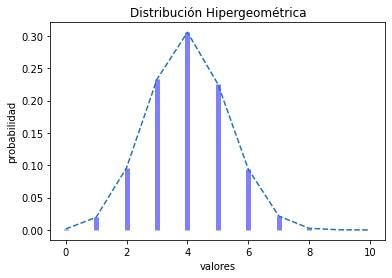

In [3]:
# Graficando Hipergeométrica
M, n, N = 30, 10, 12 # parametros de forma 
hipergeometrica = stats.hypergeom(M, n, N) # Distribución
x = np.arange(0, n+1)
fmp = hipergeometrica.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Hipergeométrica')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

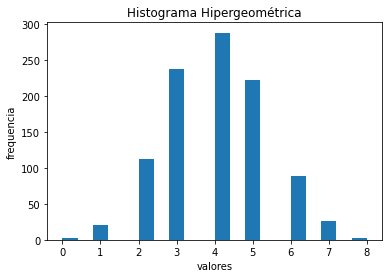

In [4]:
# histograma
aleatorios = hipergeometrica.rvs(1000)  # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Hipergeométrica')
plt.show()

#### Ejemplo de aplicación

Suponga que se venden 500 boletos de lotería y, entre ellos, 200 pagan al menos el costo del boleto.
Suponga que usted compra 5 boletos. Encuentre la probabilidad de que

- usted gane al menos el costo de 3 boletos. Sugerencia: pruebe que si se usa distribución binomial
el resultado es 0.3174 (31.74%); pero si se usa distribución hipergeométrica se obtiene 0.3167
(31.67%). Comente estos resultados.

Paso 1. Identificar el experimento:
- Estudiar el número de boletos que paguen al menos su costo en una compra de 5 boletos de
lotería

Paso 2. Identificar el tamaño del conjunto A, el número elementos de E, EC y el tamaño muestral
n:
- Tamaño de A: N = 500 boletos de lotería.
- Tamaño de E: 1 N = 200 boletos que pagan al menos su costo.
- Tamaño de EC: 2 1 N N N = − = 300 .
- Tamaño muestral: n = 5.

Paso 3. No existe independencia entre las elecciones de boletos: Las probabilidades de obtener
un boleto premiado van cambiando de elección en elección


Paso 4. Identificación de la variable aleatoria: 
- X: Número de boletos premiados entre los comprados. 


Paso 5. Deducción de la distribución: 
- $X Hipergeom ∼ (500;200;5)$.

Paso 6. Traducir las preguntas a una expresión matemática adecuada, calcular y contestar: 

a. Se pide calcular: Probabilidad de que se gane al menos el costo de 3 boletos.
Si se soluciona mediante una distribución hipergeométrica, se tendrá: 


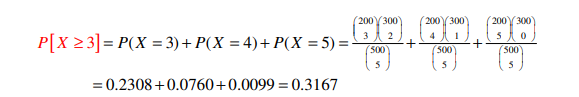

#### Uniforme

La Distribución Uniforme es un caso muy simple expresada por la función:

$$f(x; a, b) = \frac{1}{b -a} \ \mbox{para} \ a \le x \le b$$


Su función de distribución esta entonces dada por:

$$p(x;a, b) = \left\{
    \begin{array}{ll}
            0  & \mbox{si } x \le a \\
            \frac{x-a}{b-a} & \mbox{si } a \le x \le b \\
            1 & \mbox{si } b \le x
    \end{array}
\right.$$

Todos los valore tienen prácticamente la misma probabilidad.



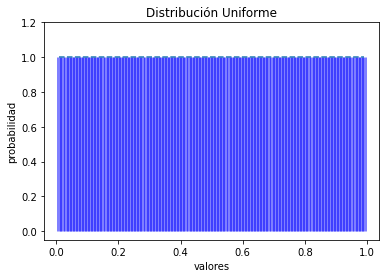

In [5]:
# Graficando Uniforme
uniforme = stats.uniform()
x = np.linspace(uniforme.ppf(0.01),
                uniforme.ppf(0.99), 100)
fp = uniforme.pdf(x) # Función de Probabilidad
fig, ax = plt.subplots()
ax.plot(x, fp, '--')
ax.vlines(x, 0, fp, colors='b', lw=5, alpha=0.5)
ax.set_yticks([0., 0.2, 0.4, 0.6, 0.8, 1., 1.2])
plt.title('Distribución Uniforme')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

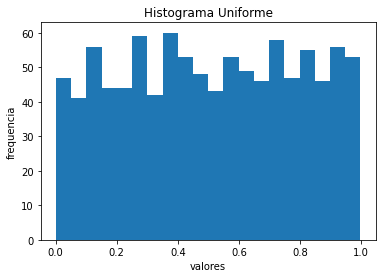

In [6]:
# histograma
aleatorios = uniforme.rvs(1000) # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Uniforme')
plt.show()

#### Ejemplo de aplicación

Sea la variable aleatoria continua  x la corriente medida, en miliamperes,en un alambre delgado de cobre. supongase que el rango de x es [0,20] mA y que la función de densidad de probabilidad de x es   f(x)=0.05,   $0\leq x\leq 20$.

a)¿Cual es la probabilidad de que una medición de corriente este entre 5 y 10 miliamperes?





### Solución

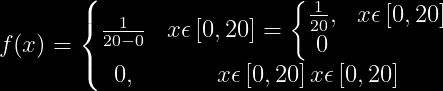

#### La probabilidad se calcula por:

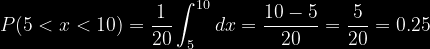

### Binomial negativa

Se considera como una distribución que se extiende la distribución geométrica. Básicamente, se utiliza en procesos que se requieran N casos favorables (primer éxito). Es decir, modela el número de ensayos necesarios para que se produzcan un número específico de eventos.

$$f(x)=\left(\begin{array}{c} x - 1 \\ r - 1 \end{array}\right) p^{r} (1 - p)^{x-r}$$

#### Condiciones:

- Cada secuencia es independiente de otras.
- En cada intento solamente son posibles dos resultados (éxito o fracaso) 
- La probabilidad de éxito es constante en cada secuencia
- Los intentos continúan hasta que se consigan r éxitos

#### Donde:

- x = número de ensayos hasta obtener el r-ésimo éxito
- p  = la probabilidad de pasar el control de calidad
- r = la cantidad de éxito

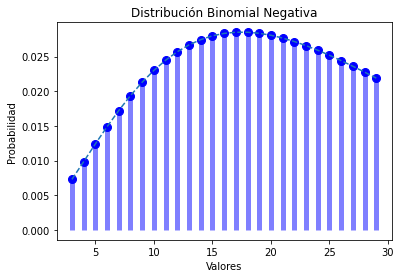

In [7]:
x = np.arange(3, 30)
r = 3
p = 0.1

binomial_negativa = stats.nbinom.pmf(x, r, p)

plt.plot(x, binomial_negativa, 'bo', ms=8)
plt.plot(x, binomial_negativa, '--', ms=8)
plt.vlines(x, 0, binomial_negativa, colors='b', lw=5, alpha=0.5)
plt.xlabel('Valores')
plt.ylabel('Probabilidad')
plt.title('Distribución Binomial Negativa')
plt.show()

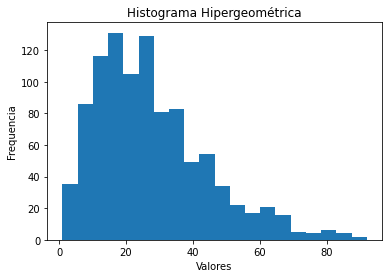

In [8]:
# histograma
aleatorios = stats.nbinom.rvs(r, p, size=1000)  # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('Frequencia')
plt.xlabel('Valores')
plt.title('Histograma Hipergeométrica')
plt.show()

#### Ejemplo 

Para tratar a un paciente de una afección de pulmón, han de ser operados en operaciones independientes sus 5 lóbulos pulmonares. La técnica a utilizar es tal que si todo va bien, lo que ocurre con probabilidad de 7/11, el lóbulo queda definitivamente sano, pero si no es así se deberá esperar el tiempo suficiente para intentarlo posteriormente de nuevo. Se practicará la cirugía hasta que 4 de sus 5 lóbulos funcionen correctamente. ¿Cuál es el valor de intervenciones que se espera que deba padecer el paciente? ¿Cuál es la probabilidad de que se necesiten 10 intervenciones?



#### Solución

Este es un ejemplo claro de experimento aleatorio regido por una ley binomial negativa, ya que se realizan intervenciones hasta que se obtengan 4 lóbulos sanos, y éste es el criterio que se utiliza para detener el proceso. Identificando los parámetros se tiene que si X= Número de operaciones hasta obtener r=4 con resultado positivo,


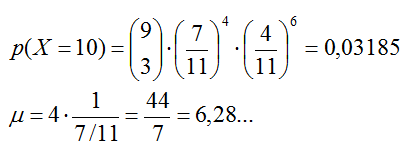

Referencias: 

- https://proyectodescartes.org/iCartesiLibri/materiales_didacticos/EstadisticaProbabilidadInferencia/VAdiscreta/4_4DistribucionBinomialNegativa.html

- https://relopezbriega.github.io/blog/2016/06/29/distribuciones-de-probabilidad-con-python/

- https://www.blogupiicsa.com/2011/01/distribucion-uniforme.html

- https://intranetua.uantof.cl/facultades/csbasicas/matematicas/academicos/jreyes/DOCENCIA/APUNTES/APUNTES%20PDF/DISCRETAS.pdf

